In [125]:
from __future__ import division # want 3 / 2 == 1.5
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce # For python3, "reduce" function is added

import numpy as np

In [126]:
def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

In [127]:
v = [x for x in range(1, 11,2)]
w = [y for y in range(11, 21,2)]

In [128]:
vector_add(v, w)

# [v for v in range(1, 11, 2)] == [1, 3, 5, 7, 9]
# [w for w in range(10, 21, 2)] == [11, 13, 15, 17, 19]

[12, 16, 20, 24, 28]

In [129]:
# Numpy version
np.array(v) + np.array(w)

array([12, 16, 20, 24, 28])

In [89]:
# 벡터 덧셈의 속도 비교, Numpy의 속도가 더 빠른 것을 확인할 수 있음

%timeit vector_add(v, w)
%timeit np.array(v) + np.array(w)

The slowest run took 4.50 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 950 ns per loop
The slowest run took 7.79 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.58 µs per loop


In [84]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

In [85]:
vector_subtract(v, w)

[5, 5, 5, 5]

In [86]:
# Numpy version (Not in Book)
np.array(v) - np.array(w)

array([5, 5, 5, 5])

In [88]:
%timeit vector_subtract(v, w)
%timeit np.array(v) - np.array(w)

The slowest run took 4.46 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 959 ns per loop
The slowest run took 7.23 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.6 µs per loop


#### 여러개의 Vector를 list로 만들어서 sum 연산을 하는 경우

In [43]:
# Original book version 
def vector_sum(vectors):
    return reduce(vector_add, vectors)

In [44]:
vectors = [v,w,v,w,v,w]
vector_sum(vectors)

[36, 48, 60, 72, 84]

In [45]:
# Modified version by sc82.choi at Gachon - *은 여러개의 argument를 list로 전환해줌
def vector_sum_modified(vectors):
    return [sum(value) for value in zip(*vectors)]

In [46]:
vectors = [v,w,v,w,v,w]
vector_sum_modified(vectors)

[36, 48, 60, 72, 84]

In [52]:
%timeit vector_sum(vectors)
%timeit vector_sum_modified(vectors)
%timeit np.sum([v,w,v,w,v,w], axis=0)

100000 loops, best of 3: 5.97 µs per loop
100000 loops, best of 3: 2.06 µs per loop
The slowest run took 5.02 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 10.1 µs per loop


In [51]:
# Numpy operation
np.sum([v,w,v,w,v,w], axis=0) 
# axis=0 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, column별로 sum operation을 하라는 의미
# axis=1 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, row별로 sum operation을 하라는 의미

array([36, 48, 60, 72, 84])

#### Scalar * Vector의 연산 ex) 2 * [1,2,3,4] = [2,4,6,8]

In [54]:
# Original book verstion
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

In [55]:
v = [5, 6, 7, 8]
scalar = 3

scalar_multiply(scalar, v)

[15, 18, 21, 24]

In [56]:
# Numpy version: Numpy는 배열의 크기가 다르더라도 기본적인 vector연산을 가능하도록 지원해준다. 이를 broadcasting이라고 함

scalar * np.array(v)

array([15, 18, 21, 24])

In [57]:
%timeit scalar_multiply(scalar, v)
%timeit scalar * np.array(v)

The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 706 ns per loop
The slowest run took 10.13 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.82 µs per loop


#### vector 의 평균 구하기: 크기가 같은 vector를 matrix형태로 입력했을 경우, 각 row별 평균을 구함

In [58]:
# Original book version

def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

In [59]:
v = [1,2,3,4]
w = [-4,-3,-2,-1]

vector_mean([v,v,v,v])

[1.0, 2.0, 3.0, 4.0]

In [60]:
# Original book version
np.mean([v,v,v,v], axis=0)
# axis=0 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, column별로 mean operation을 하라는 의미
# axis=1 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, row별로 mean operation을 하라는 의미

array([ 1.,  2.,  3.,  4.])

In [61]:
%timeit vector_mean([v,v,v,v])
%timeit np.mean([v,v,v,v], axis=0)

100000 loops, best of 3: 4.39 µs per loop
The slowest run took 6.14 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 14.5 µs per loop


#### Vector dot product: 크기가 같은 두개의 vector가 있으면, 같은 column에 해당하는 값을 곱한 후 모든 값을 더함

In [62]:
# Original book version
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

In [63]:
v = [1,2,3,4]
w = [-4,-3,-2,-1]

dot(v, w)

-20

In [64]:
# Numpy version
np.dot(v,w)

-20

In [66]:
%timeit dot(v, w)
%timeit np.dot(v, w)

The slowest run took 5.90 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.23 µs per loop
The slowest run took 5.66 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 3.63 µs per loop


#### 하나의 vector에서 값 element들을 제곱하여 더한 후 값을 반환함

In [72]:
# Original book version
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

In [73]:
v = [1,2,3,4]
sum_of_squares(v) # v * v = [1,4,9,16]

30

In [74]:
# Numpy version
np.dot(v,v) # or sum(np.square(v))

30

#### magnitude: 하나의 vector를 dot_product한 후 양의 제곱근을 구함

In [75]:
# Orginal book version
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

In [76]:
magnitude(v)

5.477225575051661

In [77]:
# Numpy version
np.linalg.norm(v)

5.4772255750516612

In [78]:
%timeit magnitude(v)
%timeit np.linalg.norm(v)

The slowest run took 7.40 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.56 µs per loop
The slowest run took 9.49 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 6.13 µs per loop


#### Distance 구하기: vector간의 거리를 구하는 공식 
- 파타고라스의 정리 처럼, 두 점(두 벡터) 사이의 거리는 (x1 - y1)^2 + (x2 - y2)^2 의 제곱근을 구해주면 됨
- 피타고라스의 정리 처럼 두 점이 이차원 평면이 아닌 n차원의 vector로 구성되는 차이점이 있음
- 정식 명칭은 Eculidian distance 라고 함

In [90]:
#original version
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [91]:
v = [1,2,3,4]
w = [-4,-3,-2,-1]

squared_distance(v,w) 

100

In [92]:
distance(v,w)

10.0

In [93]:
# Numpy version
np.linalg.norm(np.subtract(v,w)) # or np.sqrt(np.sum(np.subtract(v,w)**2))


10.0

In [95]:
%timeit distance(v, w)
%timeit np.linalg.norm(np.subtract(v,w))

The slowest run took 4.36 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.74 µs per loop
The slowest run took 23.52 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 8.93 µs per loop


#### Matrix  indexing
- shape: matrix의 크기를 구함
- get_row: matrix에서 하나의 row을 추출함
- get_column: matrix에서 하나의 column을 추출함

In [96]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

In [104]:
example_matrix = [[1,2,3,4,5], [11,12,13,14,15], [21,22,23,24,25]]

shape(example_matrix)

3

In [98]:
get_row(example_matrix, 0)

[1, 2, 3, 4, 5]

In [101]:
get_column(example_matrix,3)

[4, 14, 24]

In [38]:
# Numpy version 
np.shape(example_matrix)

(3, 5)

In [105]:
example_matrix = np.array(example_matrix)
example_matrix[0] #row slicing

array([1, 2, 3, 4, 5])

In [111]:
example_matrix[:,3] #column slicing

array([ 4, 14, 24])

#### Matrix  operation
- make_matirx: entry_fn을 기준으로 num_rows와 num_cols을 생성함
- id_diagonal: 대각행렬이 1 matrix를 만들기 위해, row와 column 의 값이 같으면 1 아니면 0을 반환
- matrix_add: matrix간 덧셈

In [112]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)]  

In [113]:
def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

In [114]:
identity_matrix = make_matrix(5, 5, is_diagonal)

identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [115]:
# Numpy version
np.identity(5)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

In [116]:
friendships = [[0, 1, 1, 0, 0, 0, 0, 0, 0, 0], # user 0
               [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], # user 1
               [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], # user 2
               [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], # user 3
               [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], # user 4
               [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], # user 5
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 6
               [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], # user 7
               [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], # user 8
               [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]] # user 9

In [117]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    def entry_fn(i, j): return A[i][j] + B[i][j]
        
    return make_matrix(num_rows, num_cols, entry_fn)

In [118]:
A = [[ 1., 0., 0.], [ 0., 1., 2.]]
B = [[ 5., 4., 3.], [ 2., 2., 2.]]

matrix_add(A,B)

[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

In [119]:
# Numpy version

np.add(A,B) # vector 마찬가지로 크기 같은 matrix 형태의 list가 돌아오면 자동으로 변환함

array([[ 6.,  4.,  3.],
       [ 2.,  3.,  4.]])

In [120]:
def make_graph_dot_product_as_vector_projection(plt):
    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis([0,2,0,2]) # 짤리는 부분이 있어서 변경
    plt.show()

Populating the interactive namespace from numpy and matplotlib


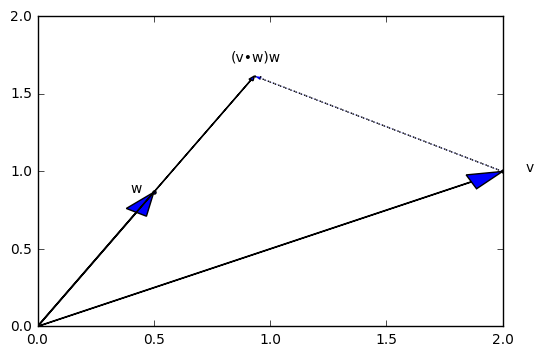

In [132]:
%pylab inline
make_graph_dot_product_as_vector_projection(plt)